Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set visual style

In [2]:
sns.set_theme(style="whitegrid")

Load dataset

In [3]:
df = sns.load_dataset('tips')

In [4]:
# Display the first few rows
print("Dataset Head:")
print(df.head())

Dataset Head:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Univariate Analysis

C:\Users\anand\AppData\Local\Temp\ipykernel_10124\3662320813.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df, palette='viridis')


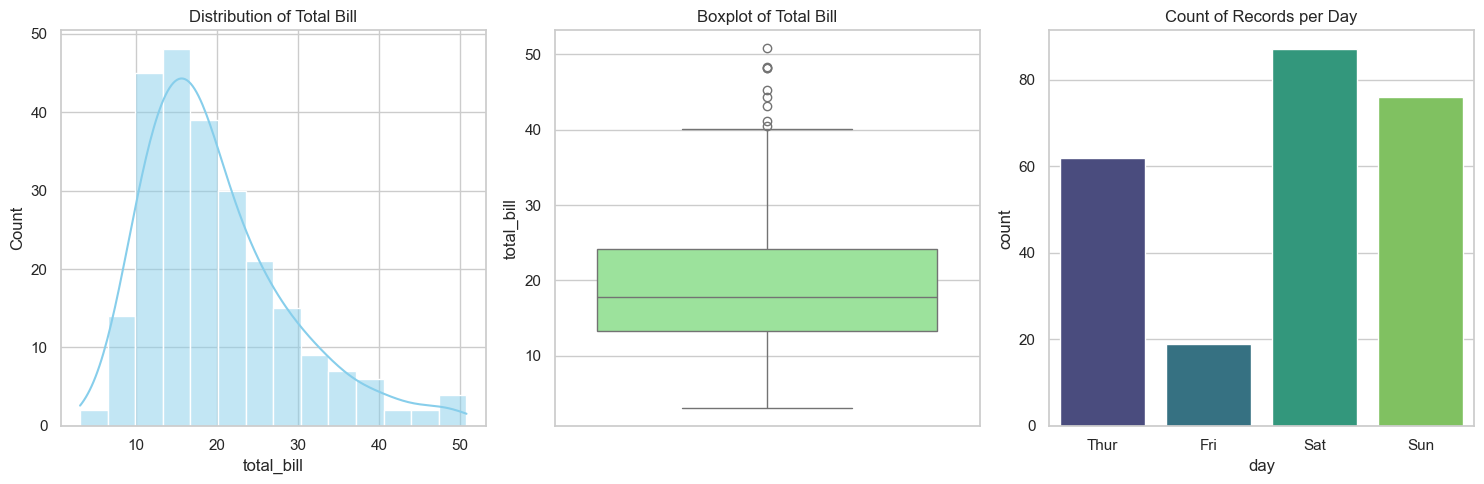

In [5]:
plt.figure(figsize=(15, 5))

# Subplot 1: Distribution of Total Bill (Histogram + KDE)
plt.subplot(1, 3, 1)
sns.histplot(df['total_bill'], kde=True, color='skyblue')
plt.title('Distribution of Total Bill')

# Subplot 2: Boxplot for Outlier Detection
plt.subplot(1, 3, 2)
sns.boxplot(y=df['total_bill'], color='lightgreen')
plt.title('Boxplot of Total Bill')

# Subplot 3: Count of entries per day
plt.subplot(1, 3, 3)
sns.countplot(x='day', data=df, palette='viridis')
plt.title('Count of Records per Day')

plt.tight_layout()
plt.show()

Bivariate Analysis

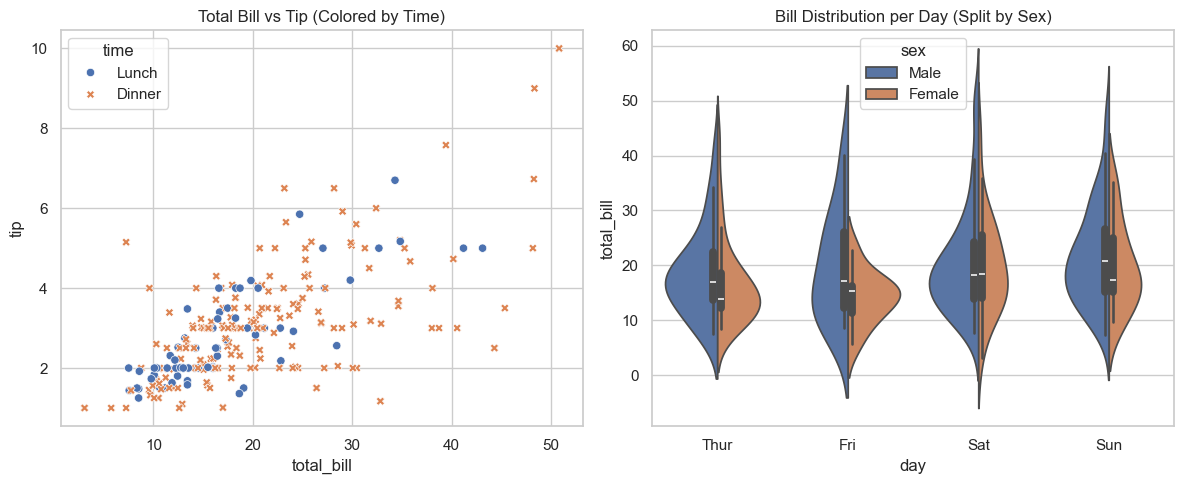

In [6]:
plt.figure(figsize=(12, 5))

# Subplot 1: Scatter plot (Relationship between Bill and Tip)
plt.subplot(1, 2, 1)
sns.scatterplot(x='total_bill', y='tip', hue='time', style='time', data=df)
plt.title('Total Bill vs Tip (Colored by Time)')

# Subplot 2: Violin Plot (Distribution of bill across different days)
plt.subplot(1, 2, 2)
sns.violinplot(x='day', y='total_bill', data=df, hue='sex', split=True)
plt.title('Bill Distribution per Day (Split by Sex)')

plt.tight_layout()
plt.show()

Multivariate Analysis

Generating Pairplot... (This may take a moment)


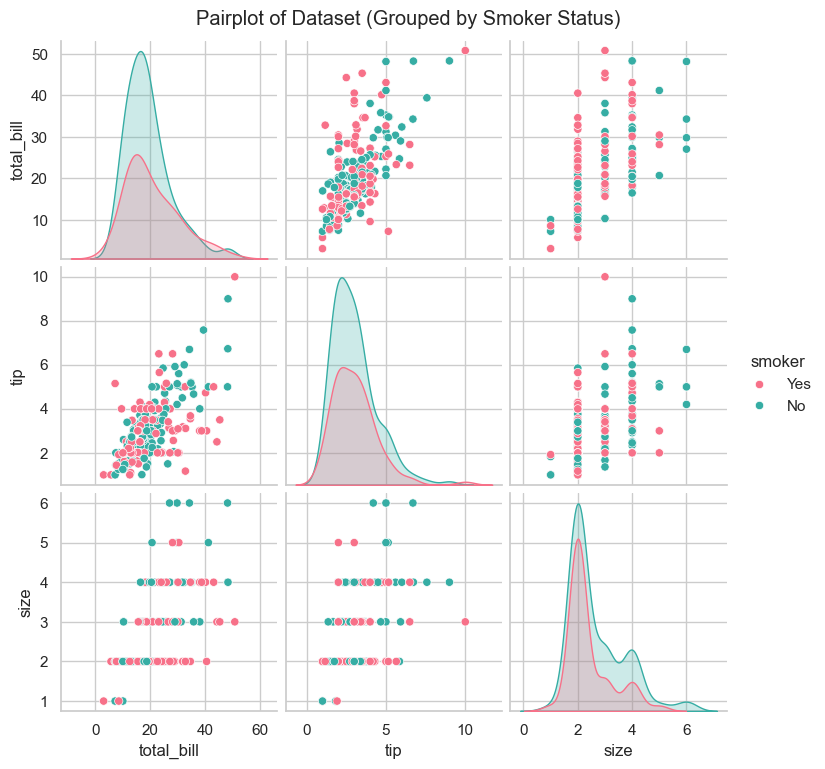

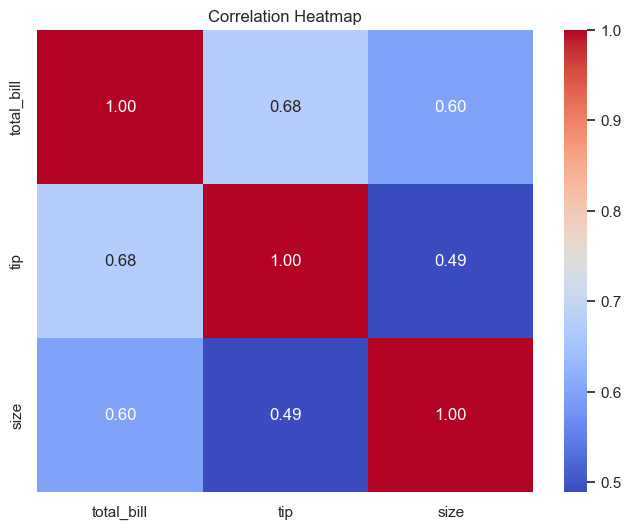

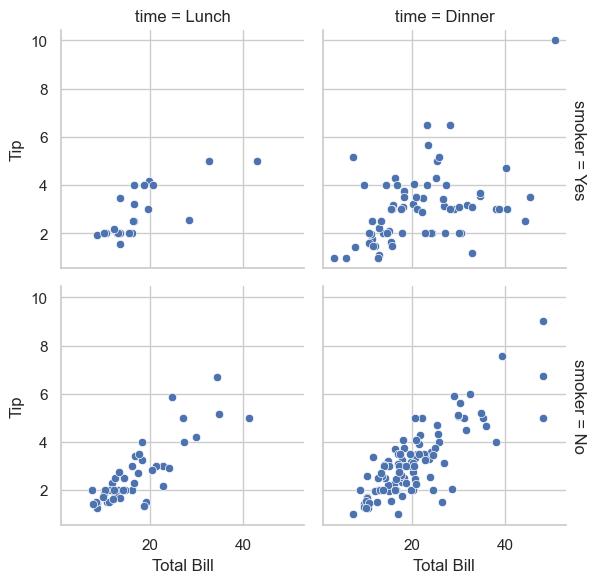

In [7]:
# 1. Pairplot: Automatic grid of relationships across all numerical variables
print("Generating Pairplot... (This may take a moment)")
sns.pairplot(df, hue='smoker', palette='husl')
plt.suptitle('Pairplot of Dataset (Grouped by Smoker Status)', y=1.02)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(8, 6))
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. FacetGrid: Multi-plot grid for complex categorical relationships
g = sns.FacetGrid(df, col="time", row="smoker", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total Bill", "Tip")
g.add_legend()
plt.show()